In [14]:
import numpy as np
from astropy.io import ascii
import scipy.ndimage
import matplotlib.pyplot as plt
import os
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest' 
matplotlib.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [15]:
#apod_sol_before_fname = "./test_scda_aplc/ApodSol_ref_qpaplc_master.dat"
#apod_sol_after_fname = "./test_scda_aplc/ApodSol_ref_qpaplc_dev2.dat"

#apod_sol_before_fname = "./test_scda_aplc/ApodSol_APLC_quart_hex1x100sm1_N0300_FPM400M050_LSann20D90clear_Img100C_35WA070CA070_BW10Nlam03fpres2_linbarpre1.dat"
apod_sol_before_fname = "./test_scda_aplc/APLC_quart_hex1x100sm1_N0300_FPM400M050_LSann20D90clear_Img100C_35WA070CA070_BW00Nlam01fpres2_linbarpre1_ApodSol.dat"
apod_sol_after_fname = "./test_scda_aplc/ApodSol_APLC_quart_hex1x100sm1_N0300_FPM400M050_LSann20D90clear_Img100C_35WA070CA070_BW10Nlam03fpres2_linbarhomopre1.dat"
telap_fname = "../2d AMPL script - quarter pupil/CircPupil_N=0300_obs=20_center_quarter_spiders3=01_gaps=01.dat"

In [16]:
apod_sol_data_before = ascii.read(apod_sol_before_fname)
apod_sol_data_after = ascii.read(apod_sol_after_fname)
telap_data = ascii.read(telap_fname)

In [17]:
N = 300
A_before = np.zeros((N,N))
A_after = np.zeros((N,N))
TelAp = np.zeros((N,N))

In [18]:
for rr in range(N*N):
    xi = rr / N
    yi = rr % N
    A_before[xi,yi] = apod_sol_data_before['col3'][rr]
    #A_before[yi,xi] = apod_sol_data_before['col3'][rr]
    A_after[yi,xi] = apod_sol_data_after['col3'][rr]
for cc in range(N):
    TelAp[:,cc] = telap_data[telap_data.colnames[cc]]

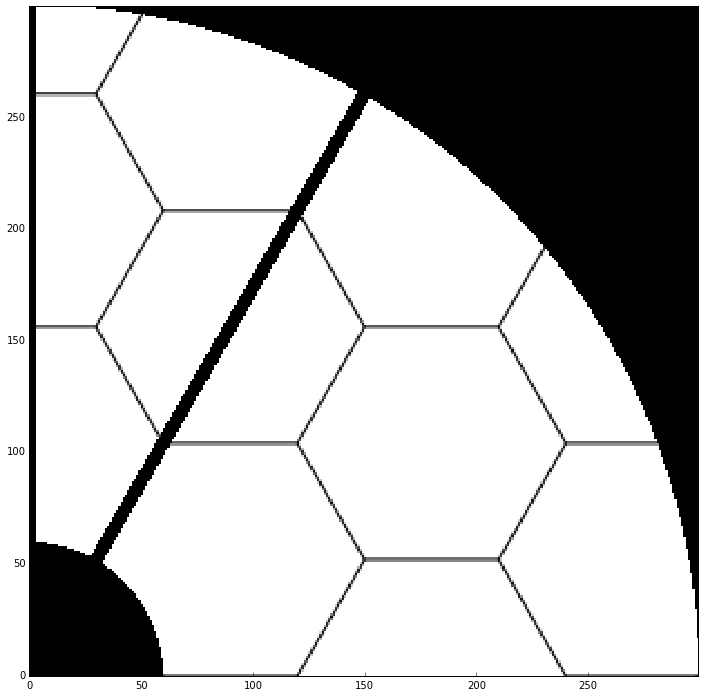

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(TelAp)

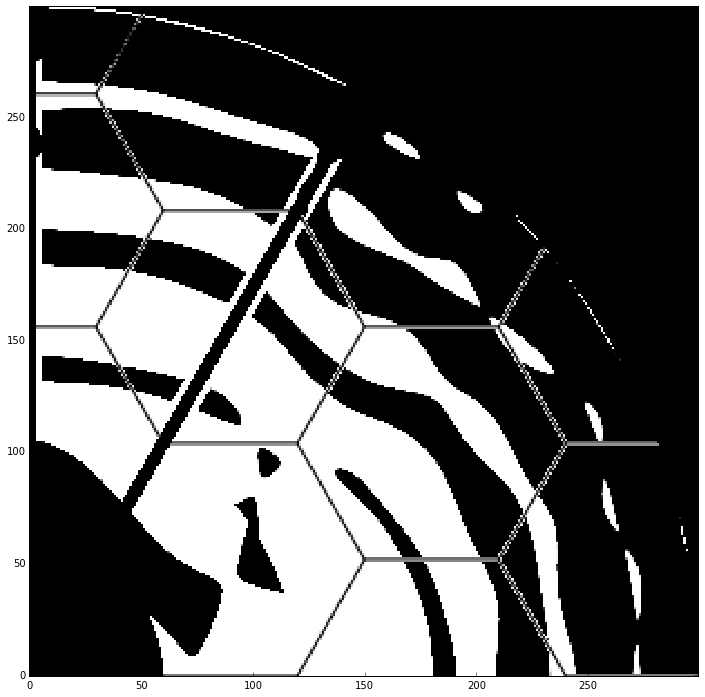

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(A_before*TelAp)

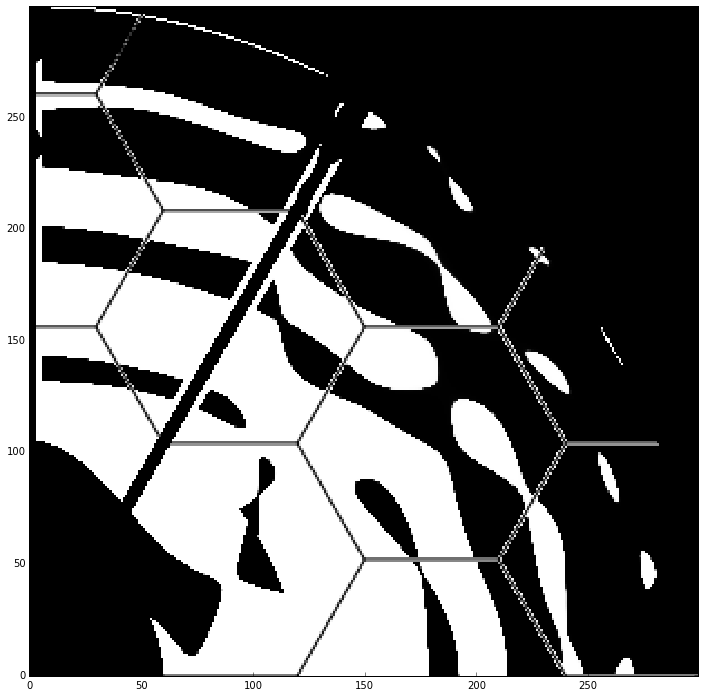

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(A_after*TelAp)